In [114]:
# Styling notebook
from IPython.core.display import display, HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

C:\Users\Renata\AppData\Local\Temp\ipykernel_21304\1617930524.py:2: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



# Inicio

## Importação de libs

In [115]:
# para ler arquivo excel (xls)
# conda install -c anaconda xlrd

import datetime
from datetime import datetime
import os

# Analise
import pandas as pd 
import numpy as np 

#Visualization
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly
import plotly.express as px

## Configurações

In [116]:
# para habilitar rolagem horizontal do dataframe 
# caso não funcione no Firefox
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

In [117]:
# formatação de mensagens de print
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
#print(color.BOLD + 'Hello World !' + color.END)

## Parâmetros

In [118]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
pd.set_option('max_colwidth', 1000) # tamanho das colunas para exibição do conteúdo de textos longos

np.set_printoptions(threshold=1000)

# Formatar numeros float (2 casas decimais)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Formatações para gráficos
sns.set(style="darkgrid") #cor da area dos plots
figsize = (10,10)

## Links uteis

- Cores em graficos plotly: https://plotly.com/python/discrete-color/
- https://www.selecolor.com/en/recommended-color-palette/
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://www.codecademy.com/article/seaborn-design-ii

# Definição de funções

## checar_df

Para um determinado dataframe, são verificados:

- total de registros;
- quantidade e tipos de colunas;
- quantidade de valores únicos;
- quantidade de valores nulos (para identificar a necessidade de pre processamento dos dados).

In [119]:
def checar_df(df):
    print(color.BOLD  + color.RED + 'Informações do dataframe: ' + color.END)
    df.info()
    
    print(color.BOLD + color.RED + "\nNúmero de observacoes na base de dados: " + color.END, df.shape[0])
    print('Total de ', df.shape[1], 'Colunas: ', df.columns.values.tolist())
    
    print(color.BOLD + color.RED + "\nNúmero de valores unicos (Não inclui NaN): " + color.END)
    display(df.nunique(dropna=True).to_frame(name='Contagem Unicos').sort_index())
    
    print(color.BOLD + color.RED + "Número de valores nulos:" + color.END)
    display(df.isnull().sum().sort_values(ascending=False).to_frame(name='Contagem Nulos').sort_index())

# Carga dos Dados 

## Dados IBGE

In [120]:
# definir os tipos de algumas colunas
# para facilitar operações de merge
list_col_string = ['COD_IBGE', 'CAPITAL','Cod_Mesorregiao','Cod_Microrregiao'] 
dict_dtype = {column : 'str'  for column in list_col_string}

ibge = pd.read_csv('./dados/preparados/dados_ibge_consolidado.csv', sep='|', 
                   dtype = dict_dtype, 
                   low_memory=False)

# renomear colunas para nomes mais intuitivos
ibge = ibge.rename(columns={'POP_IBGE_2013':'POP_2013',
                            'POP_IBGE_2022':'POP_2022'})

ibge.info()
ibge.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   REGIAO             5570 non-null   object 
 1   SIGLA_UF           5570 non-null   object 
 2   NOME_UF            5570 non-null   object 
 3   COD_IBGE           5570 non-null   object 
 4   NOME_MUNICIPIO     5570 non-null   object 
 5   LAT                5570 non-null   float64
 6   LNG                5570 non-null   float64
 7   POP_2013           5570 non-null   int64  
 8   CAPITAL            5570 non-null   object 
 9   POP_2022           5570 non-null   int64  
 10  Cod_Mesorregiao    5570 non-null   object 
 11  Nome_Mesorregiao   5570 non-null   object 
 12  Cod_Microrregiao   5570 non-null   object 
 13  Nome_Microrregiao  5570 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 609.3+ KB


,REGIAO,SIGLA_UF,NOME_UF,COD_IBGE,NOME_MUNICIPIO,LAT,LNG,POP_2013,CAPITAL,POP_2022,Cod_Mesorregiao,Nome_Mesorregiao,Cod_Microrregiao,Nome_Microrregiao
0,N,RO,Rondônia,1100015,Alta Floresta D'Oeste,-11.94,-62.00,25728,0,21558,02,Leste Rondoniense,006,Cacoal
1,N,RO,Rondônia,1100023,Ariquemes,-9.91,-63.03,101269,0,100896,02,Leste Rondoniense,003,Ariquemes
2,N,RO,Rondônia,1100031,Cabixi,-13.50,-60.54,6495,0,5107,02,Leste Rondoniense,008,Colorado do Oeste
3,N,RO,Rondônia,1100049,Cacoal,-11.43,-61.44,85863,0,92202,02,Leste Rondoniense,006,Cacoal
4,N,RO,Rondônia,1100056,Cerejeiras,-13.20,-60.82,18041,0,15237,02,Leste Rondoniense,008,Colorado do Oeste


## Dados IBGE - Agregações por UF

In [121]:
ibge_agg_uf = pd.read_csv('./dados/preparados/dados_ibge_agg_uf.csv', sep='|', 
                   low_memory=False)

# renomear colunas para nomes mais intuitivos
ibge_agg_uf = ibge_agg_uf.rename(columns={'Total_Pop_IBGE_2022':'Total_Pop_UF',
                                          'Total_Mun_IBGE_2022':'Total_Mun_UF',
                                          'Total_Meso':'Total_Meso_UF',
                                          'Total_Micro':'Total_Micro_UF',
                                         })

ibge_agg_uf.info()
ibge_agg_uf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SIGLA_UF        27 non-null     object
 1   Total_Pop_UF    27 non-null     int64 
 2   Total_Mun_UF    27 non-null     int64 
 3   Total_Meso_UF   27 non-null     int64 
 4   Total_Micro_UF  27 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ KB


,SIGLA_UF,Total_Pop_UF,Total_Mun_UF,Total_Meso_UF,Total_Micro_UF
0,AC,829780,22,2,5
1,AL,3125254,102,3,13
2,AM,3952262,62,4,13
3,AP,774268,16,2,4
4,BA,14659023,417,7,32


## Dados IBGE - Agregações por Mesorregiao

In [122]:
ibge_agg_meso = pd.read_csv('./dados/preparados/dados_ibge_agg_meso.csv', sep='|', 
                   low_memory=False)

# renomear colunas para nomes mais intuitivos
ibge_agg_meso = ibge_agg_meso.rename(columns={'Total_Pop_IBGE_2022':'Total_Pop_Meso',
                                              'Total_Mun_IBGE_2022':'Total_Mun_Meso'})

ibge_agg_meso.info()
ibge_agg_meso.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SIGLA_UF          137 non-null    object
 1   Nome_Mesorregiao  137 non-null    object
 2   Total_Pop_Meso    137 non-null    int64 
 3   Total_Mun_Meso    137 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.4+ KB


,SIGLA_UF,Nome_Mesorregiao,Total_Pop_Meso,Total_Mun_Meso
0,AC,Vale do Acre,583448,14
1,AC,Vale do Juruá,246332,8
2,AL,Agreste Alagoano,634079,24
3,AL,Leste Alagoano,2069392,52
4,AL,Sertão Alagoano,421783,26


## Dados IBGE - Agregações por Microrregião

In [123]:
ibge_agg_micro = pd.read_csv('./dados/preparados/dados_ibge_agg_micro.csv', sep='|', 
                   low_memory=False)

# renomear colunas para nomes mais intuitivos
ibge_agg_micro = ibge_agg_micro.rename(columns={'Total_Pop_IBGE_2022':'Total_Pop_Micro',
                                                'Total_Mun_IBGE_2022':'Total_Mun_Micro'})

ibge_agg_micro.info()
ibge_agg_micro.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SIGLA_UF           558 non-null    object
 1   Nome_Microrregiao  558 non-null    object
 2   Total_Pop_Micro    558 non-null    int64 
 3   Total_Mun_Micro    558 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 17.6+ KB


,SIGLA_UF,Nome_Microrregiao,Total_Pop_Micro,Total_Mun_Micro
0,AC,Brasiléia,70821,4
1,AC,Cruzeiro do Sul,157120,5
2,AC,Rio Branco,452963,7
3,AC,Sena Madureira,59664,3
4,AC,Tarauacá,89212,3


## Dados Indicadores Municipais (Atlas)

In [124]:
# definir os tipos de algumas colunas
list_col_string = ['Codmun6','Codmun7'] 
dict_dtype = {column : 'str'  for column in list_col_string}

df_ind_atlas = pd.read_csv('./dados/selecao_indicadores_sociais_municipios.csv', 
                       sep='|', dtype = dict_dtype, low_memory=False) 

# considerar apenas a ultima referencia (2010)
df_ind_atlas = df_ind_atlas[df_ind_atlas['ANO']==2010]

col_excluir = ['ANO']
for c in col_excluir: del df_ind_atlas[c]

# renomear colunas 
df_ind_atlas = df_ind_atlas.rename(columns = {
                                    'Codmun6':'CodIBGE_6',
                                    'Codmun7':'CodIBGE',
                                    'pesotot':'Pop_total',
                                    'pesourb':'Pop_urbana',
                                    'POP':'Pop_total_dom_part',    
                                    'POPT':'Pop_total_dom_part_exc_renda_nula'    
                                })

In [125]:
col_relevantes = ['CodIBGE', 'Pop_total','Pop_urbana','Pop_total_dom_part', 'Pop_total_dom_part_exc_renda_nula']
df_ind_atlas[col_relevantes].head(5).T

,11130,11131,11132,11133,11134
CodIBGE,1100015,1100023,1100031,1100049,1100056
Pop_total,24392,90353,6313,78574,17029
Pop_urbana,13970,76525,2693,61921,14419
Pop_total_dom_part,24097,89766,6303,78141,16942
Pop_total_dom_part_exc_renda_nula,22429,88730,6156,76876,16815


In [126]:
# verificar as colunas
df_ind_atlas.info(max_cols=999)

<class 'pandas.core.frame.DataFrame'>
Index: 5565 entries, 11130 to 16694
Data columns (total 111 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    UF                                 5565 non-null   int64  
 1    CodIBGE_6                          5565 non-null   object 
 2    CodIBGE                            5565 non-null   object 
 3    Município                          5565 non-null   object 
 4    T_ANALF11A14                       5565 non-null   float64
 5    T_ANALF15A17                       5565 non-null   float64
 6    T_ANALF15M                         5565 non-null   float64
 7    T_ANALF18A24                       5565 non-null   float64
 8    T_ANALF18M                         5565 non-null   float64
 9    T_ANALF25A29                       5565 non-null   float64
 10   T_ANALF25M                         5565 non-null   float64
 11   T_ATRASO_0_BASICO                  5565 n

## Dados IES - Instituições de Ensino Superior

In [127]:
ies = pd.read_csv('./dados/preparados/dados_ies_consolidado.csv', sep='|', 
                  low_memory=False)

In [128]:
# selecionar todas colunas que começam com CO_ e outras (transformar em string) 
colunas_CO = [col for col in ies if col.startswith('CO_')] + ['COD_IBGE', 'IN_CAPITAL_IES','NU_CEP_IES']
dict_dtype = {column : 'str'  for column in colunas_CO}

ies = pd.read_csv('./dados/preparados/dados_ies_consolidado.csv', sep='|', 
                  dtype = dict_dtype, 
                  low_memory=False)

ies.head(3).T

,0,1,2
NU_ANO_CENSO,2022,2022,2022
NO_REGIAO_IES,Centro-Oeste,Centro-Oeste,Centro-Oeste
CO_REGIAO_IES,5,5,5
NO_UF_IES,Mato Grosso,Mato Grosso,Mato Grosso
SG_UF_IES,MT,MT,MT
CO_UF_IES,51,51,51
NO_MUNICIPIO_IES,Cuiabá,Cuiabá,Cuiabá
IN_CAPITAL_IES,1,1,1
NO_MESORREGIAO_IES,Centro-Sul Mato-grossense,Centro-Sul Mato-grossense,Centro-Sul Mato-grossense
CO_MESORREGIAO_IES,4,4,4


In [129]:
checar_df(ies)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 94 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   NU_ANO_CENSO                       2595 non-null   int64  
 1   NO_REGIAO_IES                      2595 non-null   object 
 2   CO_REGIAO_IES                      2595 non-null   object 
 3   NO_UF_IES                          2595 non-null   object 
 4   SG_UF_IES                          2595 non-null   object 
 5   CO_UF_IES                          2595 non-null   object 
 6   NO_MUNICIPIO_IES                   2595 non-null   object 
 7   IN_CAPITAL_IES                     2595 non-null   object 
 8   NO_MESORREGIAO_IES                 2595 non-null   object 
 9   CO_MESORREGIAO_IES                 2595 non-null   object 
 10  NO_MICRORREGIAO_IES                2595 non-null   object 
 11  CO_MICRORREGIAO_IES          

,Contagem Unicos
CAPITAL,2
COD_IBGE,719
CO_IES,2595
CO_MANTENEDORA,1769
CO_MESORREGIAO_IES,15
CO_MICRORREGIAO_IES,66
CO_REGIAO_IES,5
CO_UF_IES,27
DS_COMPLEMENTO_ENDERECO_IES,893
DS_ENDERECO_IES,2217


Número de valores nulos:


,Contagem Nulos
CAPITAL,0
COD_IBGE,0
CO_IES,0
CO_MANTENEDORA,0
CO_MESORREGIAO_IES,0
CO_MICRORREGIAO_IES,0
CO_REGIAO_IES,0
CO_UF_IES,0
DS_COMPLEMENTO_ENDERECO_IES,1
DS_ENDERECO_IES,0


## Dados IES - Agregações por UF

dataframe **ies_agg_UF**: Agregações por UF

- Total_Pop_UF: total de toda a população do estado (soma da populaçao de cada municipio)
- Total_Mun_UF: quantidade de municipios existentes no estado
- Total_Meso_UF: quantidade de mesorregiões existentes no estado
- Total_Micro_UF: quantidade de microrregiões existentes no estado
- Total_IES: total de Instituições de ensino no estado
- Total_Priv: total de IES privadas no estado
- Total_Publ: total de IES publicas no estado
- Total_mun_IES: total de municipios com existencia de IES no estado
- Total_Pop_UF_IES: soma da população dos municipios do estado com existencia de IES
- Total_Meso_IES: soma das mesorregiões do estado com existencia de IES
- Total_Micro_IES: soma das microrregiões do estado com existencia de IES
- Cob_Mun_com_IES: total de municipios com IES/ total de municipios da UF (cobertura de IES)

In [130]:
ies_agg_UF = pd.read_csv('./dados/preparados/dados_IES_agg_UF.csv', sep='|', 
                   low_memory=False)

# renomear colunas para nomes mais intuitivos
ies_agg_UF = ies_agg_UF.rename(columns={'Total_mun':'Total_mun_IES',
                                        'Total_Pop_IES':'Total_Pop_UF_IES',
                                        'Total_Pop_IBGE_2022':'Total_Pop_UF',
                                        'Total_Mun_IBGE_2022':'Total_Mun_UF',
                                        'Total_Meso':'Total_Meso_UF',
                                        'Total_Micro':'Total_Micro_UF',
                                        'Prop_Mun':'Cob_Mun_com_IES',
                                        'Cob_Meso':'Cob_Meso_com_IES',
                                        'Cob_Micro':'Cob_Micro_com_IES'})

# ordenar as colunas
# desconsiderar 'IES_hab'
ies_agg_UF = ies_agg_UF[['SG_UF_IES', 'Total_Pop_UF', 'Total_Mun_UF', 'Total_Meso_UF', 'Total_Micro_UF',
                         'Total_IES', 'Total_Priv', 'Total_Publ','Total_mun_IES', 'Total_Pop_UF_IES',
                         'Total_Meso_IES','Total_Micro_IES',
                         'Cob_Mun_com_IES','Cob_Meso_com_IES','Cob_Micro_com_IES']]

ies_agg_UF.info()
ies_agg_UF.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SG_UF_IES          27 non-null     object 
 1   Total_Pop_UF       27 non-null     int64  
 2   Total_Mun_UF       27 non-null     int64  
 3   Total_Meso_UF      27 non-null     int64  
 4   Total_Micro_UF     27 non-null     int64  
 5   Total_IES          27 non-null     int64  
 6   Total_Priv         27 non-null     int64  
 7   Total_Publ         27 non-null     int64  
 8   Total_mun_IES      27 non-null     int64  
 9   Total_Pop_UF_IES   27 non-null     int64  
 10  Total_Meso_IES     27 non-null     int64  
 11  Total_Micro_IES    27 non-null     int64  
 12  Cob_Mun_com_IES    27 non-null     float64
 13  Cob_Meso_com_IES   27 non-null     float64
 14  Cob_Micro_com_IES  27 non-null     float64
dtypes: float64(3), int64(11), object(1)
memory usage: 3.3+ KB


,SG_UF_IES,Total_Pop_UF,Total_Mun_UF,Total_Meso_UF,Total_Micro_UF,Total_IES,Total_Priv,Total_Publ,Total_mun_IES,Total_Pop_UF_IES,Total_Meso_IES,Total_Micro_IES,Cob_Mun_com_IES,Cob_Meso_com_IES,Cob_Micro_com_IES
0,AC,829780,22,2,5,12,10,2,2,458713,2,2,9.09,100.00,40.00
1,AL,3125254,102,3,13,33,29,4,6,1357048,3,5,5.88,100.00,38.46
2,AM,3952262,62,4,13,32,29,3,6,2502816,1,5,9.68,25.00,38.46
3,AP,774268,16,2,4,16,13,3,2,593443,1,1,12.50,50.00,25.00
4,BA,14659023,417,7,32,153,143,10,44,7596531,7,24,10.55,100.00,75.00


In [131]:
# exemplo
ies_agg_UF[ies_agg_UF['SG_UF_IES']=='RS'].T

,22
SG_UF_IES,RS
Total_Pop_UF,11088065
Total_Mun_UF,497
Total_Meso_UF,7
Total_Micro_UF,35
Total_IES,118
Total_Priv,107
Total_Publ,11
Total_mun_IES,36
Total_Pop_UF_IES,5661809


## Dados IES - Cursos

In [220]:
# selecionar todas colunas que começam com CO_ e outras (transformar em string) 
#colunas_CO = [col for col in cursos if col.startswith('CO_')] + ['IN_CAPITAL', 'IN_GRATUITO']
colunas_CO = ['CO_REGIAO', 'CO_UF', 'CO_MUNICIPIO', 'CO_IES', 'CO_CURSO', 'CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL',
 'CO_CINE_AREA_ESPECIFICA', 'CO_CINE_AREA_DETALHADA', 'IN_CAPITAL', 'IN_GRATUITO']

In [133]:
%%time
dict_dtype = {column : 'str'  for column in colunas_CO}

cursos = pd.read_csv('./dados/preparados/dados_cursos_escopo_consolidado.csv', sep='|', 
                  dtype = dict_dtype, 
                  low_memory=False)

cursos.head(3).T

,0,1,2
NU_ANO_CENSO,2022,2022,2022
NO_REGIAO,Centro-Oeste,Centro-Oeste,Centro-Oeste
CO_REGIAO,5,5,5
NO_UF,Distrito Federal,Distrito Federal,Distrito Federal
SG_UF,DF,DF,DF
CO_UF,53,53,53
NO_MUNICIPIO,Brasília,Brasília,Brasília
CO_MUNICIPIO,5300108,5300108,5300108
IN_CAPITAL,1,1,1
TP_DIMENSAO,1,1,1


In [134]:
cursos.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31309 entries, 0 to 31308
Data columns (total 208 columns):
 #    Column                        Non-Null Count  Dtype 
---   ------                        --------------  ----- 
 0    NU_ANO_CENSO                  31309 non-null  int64 
 1    NO_REGIAO                     31309 non-null  object
 2    CO_REGIAO                     31309 non-null  object
 3    NO_UF                         31309 non-null  object
 4    SG_UF                         31309 non-null  object
 5    CO_UF                         31309 non-null  object
 6    NO_MUNICIPIO                  31309 non-null  object
 7    CO_MUNICIPIO                  31309 non-null  object
 8    IN_CAPITAL                    31309 non-null  object
 9    TP_DIMENSAO                   31309 non-null  int64 
 10   Tipo_Dimensao                 31309 non-null  object
 11   TP_ORGANIZACAO_ACADEMICA      31309 non-null  int64 
 12   Tipo_Org_Acad                 31309 non-null  object
 13  

In [135]:
checar_df(cursos)

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31309 entries, 0 to 31308
Columns: 208 entries, NU_ANO_CENSO to QT_CONC_MOB_ACADEMICA
dtypes: int64(180), object(28)
memory usage: 49.7+ MB

Número de observacoes na base de dados:  31309
Total de  208 Colunas:  ['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF', 'NO_MUNICIPIO', 'CO_MUNICIPIO', 'IN_CAPITAL', 'TP_DIMENSAO', 'Tipo_Dimensao', 'TP_ORGANIZACAO_ACADEMICA', 'Tipo_Org_Acad', 'Tipo_Org_Principal', 'TP_CATEGORIA_ADMINISTRATIVA', 'Tipo_Cat_Admn', 'TP_REDE', 'Tipo_Rede', 'CO_IES', 'NO_CURSO', 'CO_CURSO', 'NO_CINE_ROTULO', 'CO_CINE_ROTULO', 'CO_CINE_AREA_GERAL', 'NO_CINE_AREA_GERAL', 'CO_CINE_AREA_ESPECIFICA', 'NO_CINE_AREA_ESPECIFICA', 'CO_CINE_AREA_DETALHADA', 'NO_CINE_AREA_DETALHADA', 'TP_GRAU_ACADEMICO', 'Tipo_Grau_Acad', 'IN_GRATUITO', 'TP_MODALIDADE_ENSINO', 'Tipo_Mod_Ens', 'TP_NIVEL_ACADEMICO', 'Tipo_Niv_Acad', 'QT_CURSO', 'QT_VG_TOTAL', 'QT_VG_TOTAL_DIURNO', 'QT_VG_TOTAL_NOTURNO',

,Contagem Unicos
CO_CINE_AREA_DETALHADA,87
CO_CINE_AREA_ESPECIFICA,35
CO_CINE_AREA_GERAL,10
CO_CINE_ROTULO,328
CO_CURSO,31309
CO_IES,2340
CO_MUNICIPIO,970
CO_REGIAO,5
CO_UF,27
IN_CAPITAL,2


Número de valores nulos:


,Contagem Nulos
CO_CINE_AREA_DETALHADA,0
CO_CINE_AREA_ESPECIFICA,0
CO_CINE_AREA_GERAL,0
CO_CINE_ROTULO,0
CO_CURSO,0
CO_IES,0
CO_MUNICIPIO,0
CO_REGIAO,0
CO_UF,0
IN_CAPITAL,0


# Análises Exploratórias - Cursos

## Entendendo alguns campos

In [136]:
cursos['QT_CURSO'].value_counts()

QT_CURSO
1    31309
Name: count, dtype: int64

In [137]:
# Total cursos presenciais
cursos['QT_CURSO'].sum()

31309

In [138]:
# verificando o dataframe
cursos.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_DIMENSAO,Tipo_Dimensao,TP_ORGANIZACAO_ACADEMICA,Tipo_Org_Acad,Tipo_Org_Principal,TP_CATEGORIA_ADMINISTRATIVA,Tipo_Cat_Admn,TP_REDE,Tipo_Rede,CO_IES,NO_CURSO,CO_CURSO,NO_CINE_ROTULO,CO_CINE_ROTULO,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,TP_GRAU_ACADEMICO,Tipo_Grau_Acad,IN_GRATUITO,TP_MODALIDADE_ENSINO,Tipo_Mod_Ens,TP_NIVEL_ACADEMICO,Tipo_Niv_Acad,QT_CURSO,QT_VG_TOTAL,QT_VG_TOTAL_DIURNO,QT_VG_TOTAL_NOTURNO,QT_VG_TOTAL_EAD,QT_VG_NOVA,QT_VG_PROC_SELETIVO,QT_VG_REMANESC,QT_VG_PROG_ESPECIAL,QT_INSCRITO_TOTAL,QT_INSCRITO_TOTAL_DIURNO,QT_INSCRITO_TOTAL_NOTURNO,QT_INSCRITO_TOTAL_EAD,QT_INSC_VG_NOVA,QT_INSC_PROC_SELETIVO,QT_INSC_VG_REMANESC,QT_INSC_VG_PROG_ESPECIAL,QT_ING,QT_ING_FEM,QT_ING_MASC,QT_ING_DIURNO,QT_ING_NOTURNO,QT_ING_VG_NOVA,QT_ING_VESTIBULAR,QT_ING_ENEM,QT_ING_AVALIACAO_SERIADA,QT_ING_SELECAO_SIMPLIFICA,QT_ING_EGR,QT_ING_OUTRO_TIPO_SELECAO,QT_ING_PROC_SELETIVO,QT_ING_VG_REMANESC,QT_ING_VG_PROG_ESPECIAL,QT_ING_OUTRA_FORMA,QT_ING_0_17,QT_ING_18_24,QT_ING_25_29,QT_ING_30_34,QT_ING_35_39,QT_ING_40_49,QT_ING_50_59,QT_ING_60_MAIS,QT_ING_BRANCA,QT_ING_PRETA,QT_ING_PARDA,QT_ING_AMARELA,QT_ING_INDIGENA,QT_ING_CORND,QT_MAT,QT_MAT_FEM,QT_MAT_MASC,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT_0_17,QT_MAT_18_24,QT_MAT_25_29,QT_MAT_30_34,QT_MAT_35_39,QT_MAT_40_49,QT_MAT_50_59,QT_MAT_60_MAIS,QT_MAT_BRANCA,QT_MAT_PRETA,QT_MAT_PARDA,QT_MAT_AMARELA,...,QT_CONC_18_24,QT_CONC_25_29,QT_CONC_30_34,QT_CONC_35_39,QT_CONC_40_49,QT_CONC_50_59,QT_CONC_60_MAIS,QT_CONC_BRANCA,QT_CONC_PRETA,QT_CONC_PARDA,QT_CONC_AMARELA,QT_CONC_INDIGENA,QT_CONC_CORND,QT_ING_NACBRAS,QT_ING_NACESTRANG,QT_MAT_NACBRAS,QT_MAT_NACESTRANG,QT_CONC_NACBRAS,QT_CONC_NACESTRANG,QT_ALUNO_DEFICIENTE,QT_ING_DEFICIENTE,QT_MAT_DEFICIENTE,QT_CONC_DEFICIENTE,QT_ING_FINANC,QT_ING_FINANC_REEMB,QT_ING_FIES,QT_ING_RPFIES,QT_ING_FINANC_REEMB_OUTROS,QT_ING_FINANC_NREEMB,QT_ING_PROUNII,QT_ING_PROUNIP,QT_ING_NRPFIES,QT_ING_FINANC_NREEMB_OUTROS,QT_MAT_FINANC,QT_MAT_FINANC_REEMB,QT_MAT_FIES,QT_MAT_RPFIES,QT_MAT_FINANC_REEMB_OUTROS,QT_MAT_FINANC_NREEMB,QT_MAT_PROUNII,QT_MAT_PROUNIP,QT_MAT_NRPFIES,QT_MAT_FINANC_NREEMB_OUTROS,QT_CONC_FINANC,QT_CONC_FINANC_REEMB,QT_CONC_FIES,QT_CONC_RPFIES,QT_CONC_FINANC_REEMB_OUTROS,QT_CONC_FINANC_NREEMB,QT_CONC_PROUNII,QT_CONC_PROUNIP,QT_CONC_NRPFIES,QT_CONC_FINANC_NREEMB_OUTROS,QT_ING_RESERVA_VAGA,QT_ING_RVREDEPUBLICA,QT_ING_RVETNICO,QT_ING_RVPDEF,QT_ING_RVSOCIAL_RF,QT_ING_RVOUTROS,QT_MAT_RESERVA_VAGA,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_MAT_RVPDEF,QT_MAT_RVSOCIAL_RF,QT_MAT_RVOUTROS,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_CONC_RVPDEF,QT_CONC_RVSOCIAL_RF,QT_CONC_RVOUTROS,QT_SIT_TRANCADA,QT_SIT_DESVINCULADO,QT_SIT_TRANSFERIDO,QT_SIT_FALECIDO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_ING_PROCNAOINFORMADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_MAT_PROCNAOINFORMADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,QT_CONC_PROCNAOINFORMADA,QT_PARFOR,QT_ING_PARFOR,QT_MAT_PARFOR,QT_CONC_PARFOR,QT_APOIO_SOCIAL,QT_ING_APOIO_SOCIAL,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
0,2022,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,1,1,Cursos presenciais,1,Universidade,Faculdade,1,Pública Federal,1,Pública,2,Administração,145,Administração,"""0413A01""",4,"Negócios, administração e direito",41,Negócios e administração,413,Gestão e administração,1,Bacharelado,1,1,Presencial,1,Graduacao,1,271,139,132,0,250,0,21,0,1052,593,459,0,1031,0,21,0,250,115,135,114,136,236,62,69,105,0,0,0,0,10,0,4,2,219,17,4,3,3,2,0,106,35,107,0,0,2,1289,565,724,650,639,2,950,236,58,13,25,5,0,375,97,794,16,...,87,68,20,3,2,1,0,67,11,96,7,0,0,250,0,1278,11,177,4,6,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Entendendo vagas, matriculas, ingressantes

In [173]:
print(cursos['QT_VG_TOTAL'].sum())
print(cursos['QT_INSCRITO_TOTAL'].sum())
print(cursos['QT_ING'].sum())
print(cursos['QT_MAT'].sum())

5348216
7502694
1483704
4464976


In [174]:
# Total Vagas em todo Brasil
print('Quantidade total de vagas PRESENCIAIS em 2022: ', cursos['QT_VG_TOTAL'].sum())
print('Quantidade total de vagas PRESENCIAIS - diurno em 2022: ', cursos['QT_VG_TOTAL_DIURNO'].sum())
print('Quantidade total de vagas PRESENCIAIS - noturno em 2022: ', cursos['QT_VG_TOTAL_NOTURNO'].sum())

print('\nQuantidade total de vagas PRESENCIAIS - processo seletivo -  em 2022: ', cursos['QT_VG_PROC_SELETIVO'].sum())
print('Quantidade total de vagas PRESENCIAIS - novas em 2022: ', cursos['QT_VG_NOVA'].sum())
print('Quantidade total de vagas PRESENCIAIS - remanescentes em 2022: ', cursos['QT_VG_REMANESC'].sum())
print('Quantidade total de vagas PRESENCIAIS - especiais em 2022: ', cursos['QT_VG_PROG_ESPECIAL'].sum())

print('\nQuantidade total de matriculas PRESENCIAIS em 2022: ', cursos['QT_INSCRITO_TOTAL'].sum())
print('Quantidade total de matriculas PRESENCIAIS - diurno em 2022: ', cursos['QT_INSCRITO_TOTAL_DIURNO'].sum())
print('Quantidade total de matriculas PRESENCIAIS - noturno em 2022: ', cursos['QT_INSCRITO_TOTAL_NOTURNO'].sum())

print('\nQuantidade total de ingressantes PRESENCIAIS em 2022: ', cursos['QT_ING'].sum())

Quantidade total de vagas PRESENCIAIS em 2022:  5348216
Quantidade total de vagas PRESENCIAIS - diurno em 2022:  2005308
Quantidade total de vagas PRESENCIAIS - noturno em 2022:  3342908

Quantidade total de vagas PRESENCIAIS - processo seletivo -  em 2022:  0
Quantidade total de vagas PRESENCIAIS - novas em 2022:  3542440
Quantidade total de vagas PRESENCIAIS - remanescentes em 2022:  1781737
Quantidade total de vagas PRESENCIAIS - especiais em 2022:  24039

Quantidade total de matriculas PRESENCIAIS em 2022:  7502694
Quantidade total de matriculas PRESENCIAIS - diurno em 2022:  3872073
Quantidade total de matriculas PRESENCIAIS - noturno em 2022:  3630621

Quantidade total de ingressantes PRESENCIAIS em 2022:  1483704


## Entendendo Areas Geral, Especifica, Detalhada

In [208]:
colunas = ['NO_CINE_AREA_GERAL', 'NO_CINE_AREA_ESPECIFICA','NO_CINE_AREA_DETALHADA']
lista_cursos = cursos.groupby(colunas)['QT_CURSO'].sum().reset_index()
lista_cursos.sort_values(by='QT_CURSO', ascending=False)

,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,QT_CURSO
63,"Negócios, administração e direito",Negócios e administração,Gestão e administração,3357
41,Educação,Educação,Formação de professores em áreas específicas (exceto Letras),2495
75,Saúde e bem-estar,Saúde,"Promoção, prevenção, terapia e reabilitação",2339
59,"Negócios, administração e direito",Direito,Direito,1669
42,Educação,Educação,Formação de professores sem áreas específicas,1219
60,"Negócios, administração e direito",Negócios e administração,Contabilidade e tributação,1190
70,Saúde e bem-estar,Saúde,Enfermagem,1149
33,Computação e Tecnologias da Informação e Comunicação (TIC),Computação e Tecnologias da Informação e Comunicação (TIC),Gestão e desenvolvimento de sistemas de informação,1094
27,"Ciências sociais, comunicação e informação",Ciências sociais e comportamentais,Psicologia,1065
45,"Engenharia, produção e construção",Arquitetura e construção,Engenharia civil e construção,1036


In [209]:
lista_cursos[lista_cursos['NO_CINE_AREA_GERAL']=='Negócios, administração e direito']

,NO_CINE_AREA_GERAL,NO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_DETALHADA,QT_CURSO
59,"Negócios, administração e direito",Direito,Direito,1669
60,"Negócios, administração e direito",Negócios e administração,Contabilidade e tributação,1190
61,"Negócios, administração e direito",Negócios e administração,"Finanças, bancos e seguros",202
62,"Negócios, administração e direito",Negócios e administração,Gestão comercial,193
63,"Negócios, administração e direito",Negócios e administração,Gestão e administração,3357
64,"Negócios, administração e direito",Negócios e administração,Marketing e propaganda,710
65,"Negócios, administração e direito",Negócios e administração,Secretariado e trabalhos de escritório,29
66,"Negócios, administração e direito","Programas interdisciplinares abrangendo negócios, administração e direito","Programas interdisciplinares abrangendo negócios, administração e direito",5


# Graficos - Informações IES

Todos os gráficos com a distribuição das IES estão considerando TODAS as instituições, sem filtros.

## Distribuição IES por Organização Acadêmica - Brasil

Total de IES - Brasil (2022):  2595


,Tipo_Org_Acad,Total_IES,Total_IES_p
0,Faculdade,1968,75.84
1,Centro Universitário,381,14.68
2,Universidade,205,7.90
3,"Instituto Federal de Educação, Ciência e Tecnologia",39,1.50
4,Centro Federal de Educação Tecnológica,2,0.08


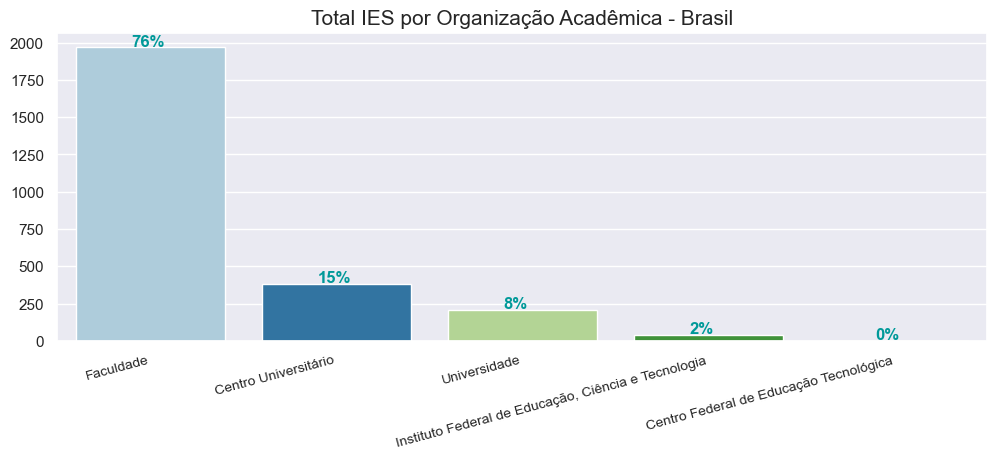

In [139]:
# total de IES no Brasil
total_ies = ies['NO_IES'].count()

# total de IES por Organizacao Academica
total_ies_org_acad = ies['Tipo_Org_Acad'].value_counts()

# percentual de IES por Organizacao Academica
perc_ies_org_acad = round(total_ies_org_acad / total_ies * 100,2) 

# consolidar em dataframe
distr_ies_org_acad = pd.DataFrame({'Total_IES'   : total_ies_org_acad,
                                   'Total_IES_p':  perc_ies_org_acad}).reset_index()

print('Total de IES - Brasil (2022): ', total_ies)
display(distr_ies_org_acad)

f, axes = plt.subplots(1, 1,  figsize=(12, 4))
cores = sns.color_palette("Paired")
sns.barplot(x='Tipo_Org_Acad', y='Total_IES', data=distr_ies_org_acad, ax=axes, palette=cores)

axes.set_title("Total IES por Organização Acadêmica - Brasil", fontsize=15)
axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha="right", fontsize=10)
axes.set(xlabel=''); axes.set(ylabel='')

lista_perc = distr_ies_org_acad['Total_IES_p'].values
for i, p in enumerate(axes.patches):
        axes.annotate('{:,.0f}%'.format(lista_perc[i]), 
                      (p.get_x()+0.3, p.get_height()+10) , 
                     fontsize=12, weight='bold', color='#009999')
plt.show()

## Distribuição IES por Categoria Administrativa - Brasil

Total de IES - Brasil (2022):  2595


,Tipo_Cat_Admn,Total_IES,Total_IES_p
0,Privada com fins lucrativos,1449,55.84
1,Privada sem fins lucrativos,834,32.14
2,Pública Estadual,133,5.13
3,Pública Federal,120,4.62
4,Pública Municipal,34,1.31
5,Especial,25,0.96


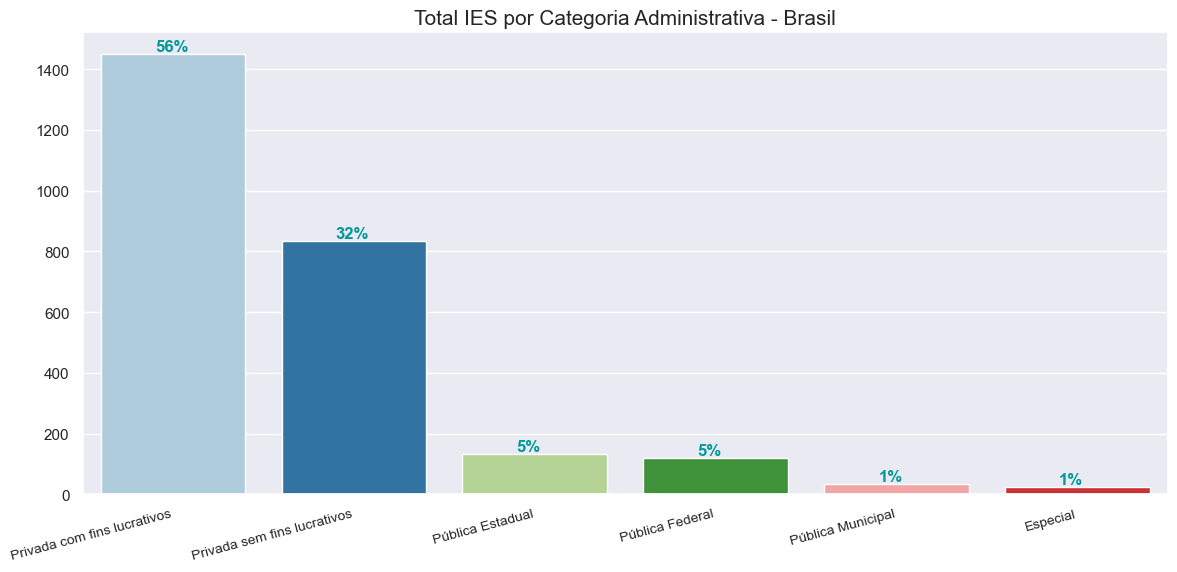

In [176]:
# total de IES no Brasil
total_ies = ies['NO_IES'].count()

# total de IES por Categoria Adm
total_ies_cat_adm = ies['Tipo_Cat_Admn'].value_counts()#.reset_index().rename(columns={'count':'Total'})

# percentual de IES por Categoria Adm
perc_ies_cat_adm = round(total_ies_cat_adm / total_ies * 100,2) 

# consolidar em dataframe
distr_ies_cat_br = pd.DataFrame({'Total_IES'   : total_ies_cat_adm,
                                 'Total_IES_p':  perc_ies_cat_adm}).reset_index()

print('Total de IES - Brasil (2022): ', total_ies)
display(distr_ies_cat_br)

f, axes = plt.subplots(1, 1,  figsize=(14, 6))
cores = sns.color_palette("Paired")
sns.barplot(x='Tipo_Cat_Admn', y='Total_IES', data=distr_ies_cat_br, ax=axes, palette=cores)

axes.set_title("Total IES por Categoria Administrativa - Brasil", fontsize=15)
axes.set_xticklabels(axes.get_xticklabels(), rotation=15, ha="right", fontsize=10)
axes.set(xlabel=''); axes.set(ylabel='')

lista_perc = distr_ies_cat_br['Total_IES_p'].values
for i, p in enumerate(axes.patches):
        axes.annotate('{:,.0f}%'.format(lista_perc[i]), 
                      (p.get_x()+0.3, p.get_height()+10) , 
                     fontsize=12, weight='bold', color='#009999')
plt.show()

## Distribuição IES - agrupado por UF

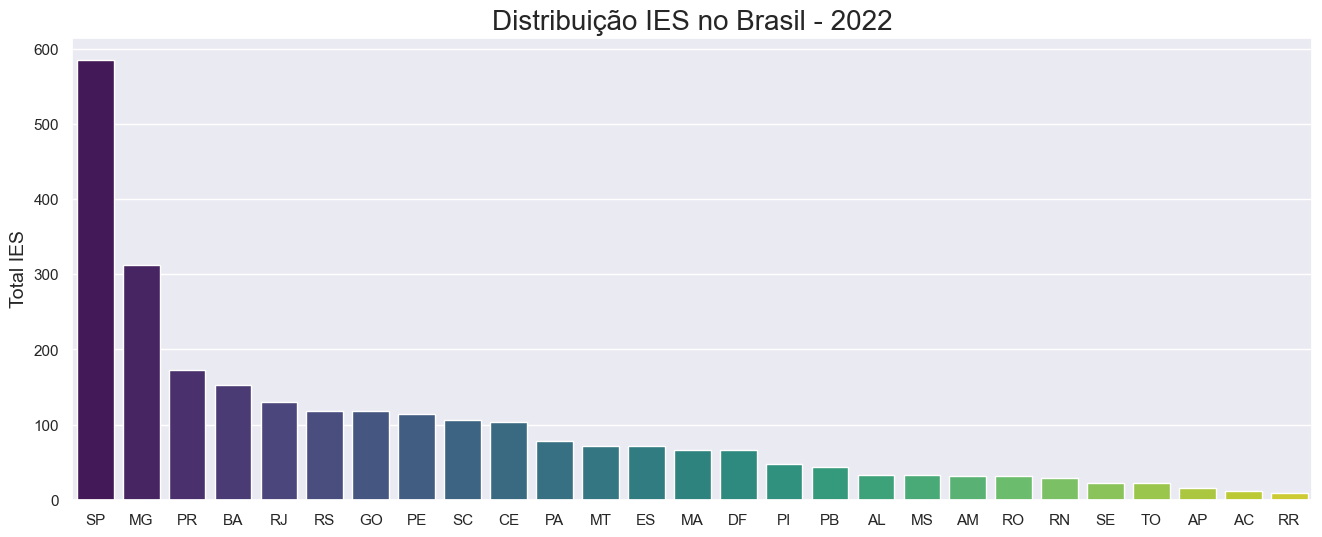

In [141]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

cores = sns.color_palette("viridis", 27)

g = sns.barplot(x='SG_UF_IES', 
                y='Total_IES', 
                data=ies_agg_UF.sort_values(by='Total_IES', ascending=False),
                palette = cores)

axes.set_title('Distribuição IES no Brasil - 2022', fontsize=20)
axes.set_ylabel('Total IES', fontsize=14)
axes.set(xlabel='') 

plt.show()

In [142]:
# grafico ALTERNATIVO (interativo)

fig = px.bar(ies_agg_UF.sort_values(by='Total_IES', ascending=False),
             x='SG_UF_IES', 
             y='Total_IES', 
             color='Total_IES',
             color_continuous_scale='viridis_r',
             width=1100, height=600,
             title='Distribuição IES no Brasil - 2022')

# inserir titulo 
fig.update_layout(title={'text': "Distribuição IES no Brasil - 2022", 'y':0.90, 'x':0.5},
                  yaxis=dict(title='Total IES', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),
                  coloraxis_showscale=False)

# rotacionar valores no eixo x
fig.update_xaxes(tickangle = -45)

fig.show()

## Distribuição IES - agrupado por UF/ Organização Academica 

Realizou-se agrupamento dos valores:
- Faculdade (agrupamento de Universidade e Faculdade)
- Centro Universitário
- Outros (agrupamento de Instituto Federal de Educação, Ciência e Tecnologia; Centro Federal de Educação Tecnológica)

In [143]:
# Verficacao inicial 
ies['Tipo_Org_Acad'].value_counts()

Tipo_Org_Acad
Faculdade                                              1968
Centro Universitário                                    381
Universidade                                            205
Instituto Federal de Educação, Ciência e Tecnologia      39
Centro Federal de Educação Tecnológica                    2
Name: count, dtype: int64

In [144]:
# Verficacao inicial 
ies['Tipo_Org_Principal'].value_counts()

Tipo_Org_Principal
Faculdade               2173
Centro Universitário     381
Outros                    41
Name: count, dtype: int64

In [145]:
# total de IES por UF
tot_ies_uf = ies.groupby('SG_UF_IES')['NO_IES'].count()

# total de IES por Org e UF
tot_ies_org_uf = ies.groupby(['SG_UF_IES','Tipo_Org_Principal'])['NO_IES'].count()

# percentual de IES por Tipo e UF
perc_ies_org_uf = round(tot_ies_org_uf / tot_ies_uf *100,2)

# consolidar em dataframe
distr_ies_org_uf = pd.DataFrame({'Total_Org'   : tot_ies_org_uf,
                                 'Total_Org_p': perc_ies_org_uf}).reset_index()

# exibir primeiras linhas
distr_ies_org_uf.head()
#display(distr_ies_org_uf.sort_values(by='SG_UF_IES', ascending=True).head(6))

,SG_UF_IES,Tipo_Org_Principal,Total_Org,Total_Org_p
0,AC,Centro Universitário,3,25.00
1,AC,Faculdade,8,66.67
2,AC,Outros,1,8.33
3,AL,Centro Universitário,4,12.12
4,AL,Faculdade,28,84.85


In [146]:
fig = px.bar(distr_ies_org_uf.sort_values(by='Total_Org', ascending=False),
             x='SG_UF_IES', 
             y='Total_Org', 
             color='Tipo_Org_Principal',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             barmode = 'group', width=1000, height=600,
             title='Distribuição IES no Brasil por UF e Tipo Organização Acadêmica - 2022',
             hover_data = {'SG_UF_IES','Tipo_Org_Principal','Total_Org',
                           'Total_Org_p'}
             
            )

fig.update_layout(yaxis=dict(title='Total Organizações', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),      # remover titulo no eixo x
                  legend=dict(x=0.25,y=0.9)) # deslocar legenda para dentro do plot

fig.show()

In [147]:
# checar um exemplo
distr_ies_org_uf[distr_ies_org_uf['SG_UF_IES']=='SP']

,SG_UF_IES,Tipo_Org_Principal,Total_Org,Total_Org_p
74,SP,Centro Universitário,90,15.38
75,SP,Faculdade,494,84.44
76,SP,Outros,1,0.17


## Distribuição IES - agrupado por UF/ Categoria Administrativa 

Categoria siplificada em: pública ou privada

In [148]:
# total de IES por UF
tot_ies_uf = ies.groupby('SG_UF_IES')['NO_IES'].count()

# total de IES por Tipo e UF
tot_ies_tp_uf = ies.groupby(['SG_UF_IES','TIPO_INST'])['NO_IES'].count()

# percentual de IES por Tipo e UF
perc_ies_tp_uf = round(tot_ies_tp_uf / tot_ies_uf *100,2)

# consolidar em dataframe
distr_ies_tp_uf = pd.DataFrame({'Total_IES'   : tot_ies_tp_uf,
                                'Total_IES_p': perc_ies_tp_uf}).reset_index()

# exibir primeiras linhas
distr_ies_tp_uf.head()
display(distr_ies_tp_uf.sort_values(by='SG_UF_IES', ascending=True).head(6))

,SG_UF_IES,TIPO_INST,Total_IES,Total_IES_p
0,AC,Privada,10,83.33
1,AC,Pública,2,16.67
2,AL,Privada,29,87.88
3,AL,Pública,4,12.12
4,AM,Privada,29,90.62
5,AM,Pública,3,9.38


In [149]:
fig = px.bar(distr_ies_tp_uf.sort_values(by='Total_IES', ascending=False),
             x='SG_UF_IES', 
             y='Total_IES', 
             color='TIPO_INST',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             barmode = 'group', width=1000, height=600,
             title='Distribuição IES no Brasil por UF e Categoria Administrativa - 2022',
             hover_data = {'SG_UF_IES','TIPO_INST','Total_IES',
                           'Total_IES_p'}
             
            )

fig.update_layout(yaxis=dict(title='Total IES', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),      # remover titulo no eixo x
                  legend=dict(x=0.25,y=0.9)) # deslocar legenda para dentro do plot

fig.show()

## Distribuição IES - agrupado por UF / população e cobertura de municipios

In [150]:
ies_agg_UF.head()

,SG_UF_IES,Total_Pop_UF,Total_Mun_UF,Total_Meso_UF,Total_Micro_UF,Total_IES,Total_Priv,Total_Publ,Total_mun_IES,Total_Pop_UF_IES,Total_Meso_IES,Total_Micro_IES,Cob_Mun_com_IES,Cob_Meso_com_IES,Cob_Micro_com_IES
0,AC,829780,22,2,5,12,10,2,2,458713,2,2,9.09,100.00,40.00
1,AL,3125254,102,3,13,33,29,4,6,1357048,3,5,5.88,100.00,38.46
2,AM,3952262,62,4,13,32,29,3,6,2502816,1,5,9.68,25.00,38.46
3,AP,774268,16,2,4,16,13,3,2,593443,1,1,12.50,50.00,25.00
4,BA,14659023,417,7,32,153,143,10,44,7596531,7,24,10.55,100.00,75.00


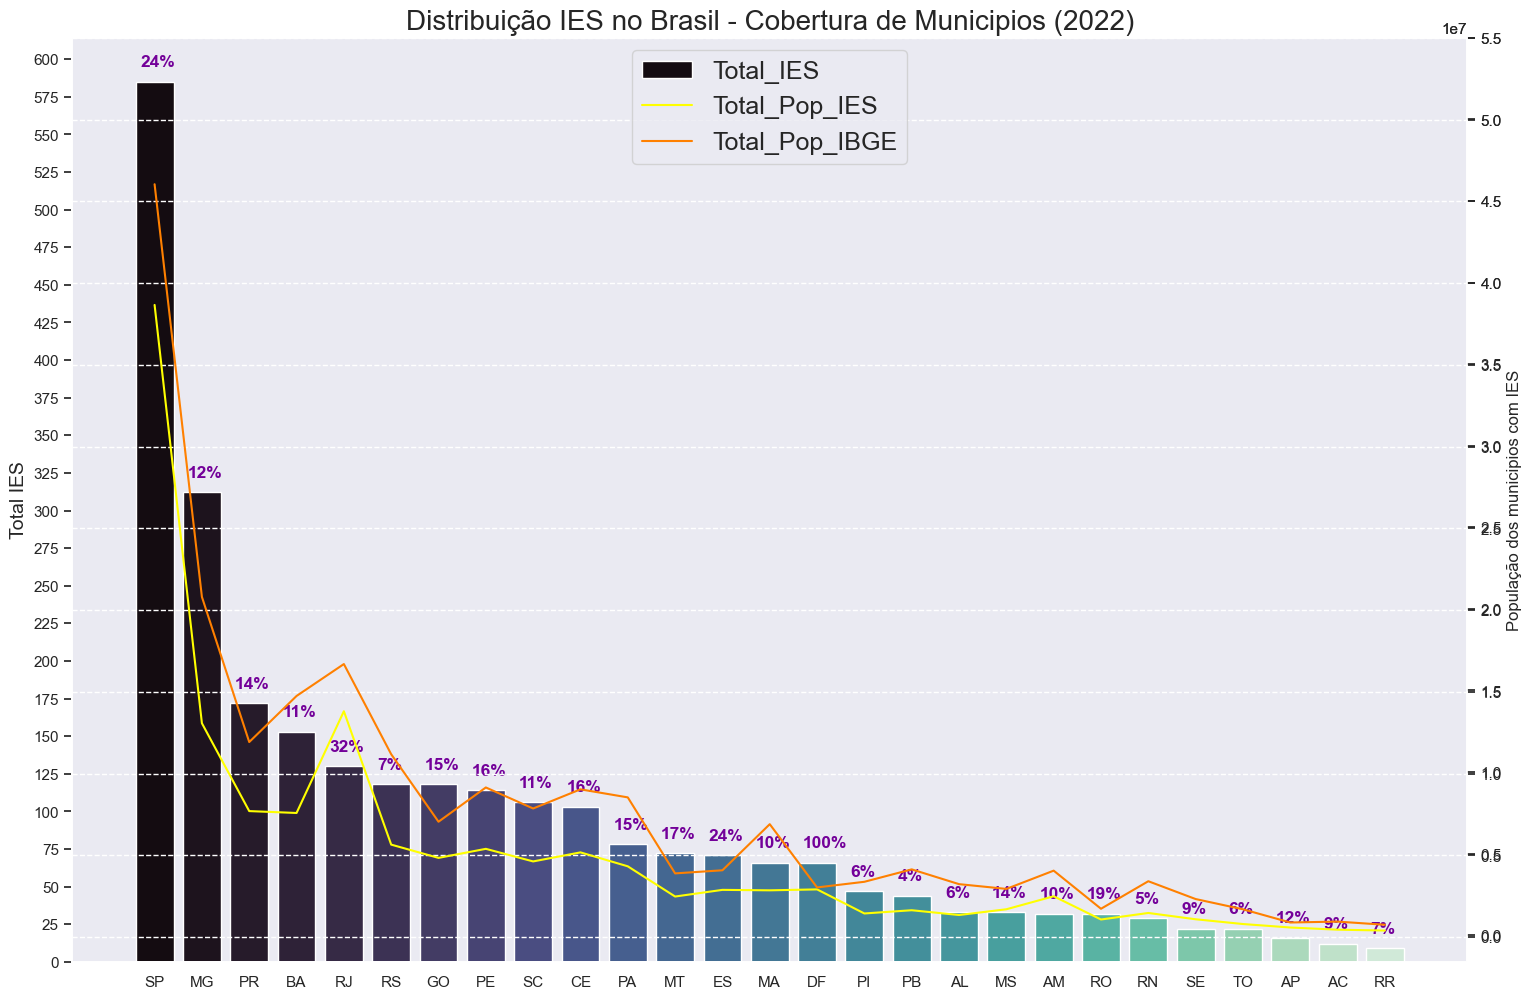

In [151]:
#f, axes = plt.subplots(1, 1,  figsize=(16, 8))
fig = plt.figure(figsize=(18, 12))
axes = fig.add_subplot(111)

cores = sns.color_palette("mako", 27) # magma
interval_x = np.arange(0,625,25) # intervalo eixos população
interval_y = np.arange(0,60000000,5000000) # intervalo eixos população

g = sns.barplot(x='SG_UF_IES', 
                y='Total_IES', 
                data=ies_agg_UF.sort_values(by='Total_IES', ascending=False),
                palette = cores, 
                label='Total_IES')

axes.set_title('Distribuição IES no Brasil - Cobertura de Municipios (2022)', fontsize=20)
axes.set_ylabel('Total IES', fontsize=14)
axes.yaxis.set_ticks(interval_x)
axes.set(xlabel='') 

ax2 = axes.twinx()
ax2.plot(ies_agg_UF.sort_values(by='Total_IES', ascending=False)['SG_UF_IES'], 
         ies_agg_UF.sort_values(by='Total_IES', ascending=False)['Total_Pop_UF_IES'],
        color='#ffff00', label='Total_Pop_IES')
ax2.set_ylabel("População dos municipios com IES")

ax3 = axes.twinx()
ax3.plot(ies_agg_UF.sort_values(by='Total_IES', ascending=False)['SG_UF_IES'], 
         ies_agg_UF.sort_values(by='Total_IES', ascending=False)['Total_Pop_UF'],
        color='#ff8000', label='Total_Pop_IBGE')
#ax3.set_ylabel("População total da UF")

axes.grid(visible=False)

ax2.grid(visible=True, linestyle = "dashed", color='white')
ax2.yaxis.set_ticks(interval_y)
#ax2.yaxis.set_visible(False) # remove yticks

ax3.grid(visible=False)
ax3.yaxis.set_ticks(interval_y)
ax3.yaxis.set_visible(True) # remove yticks

lines1, labels1 = axes.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc="upper center", fontsize=18)

valores_prop_mun =  ies_agg_UF.sort_values(by='Total_IES', ascending=False)['Cob_Mun_com_IES'].values
for i, p in enumerate(axes.patches):
        axes.annotate('{:,.0f}%'.format(valores_prop_mun[i]), 
                      (p.get_x()+0.1, p.get_height()+10) , 
                     fontsize=12.5, weight='bold', color='#730099')

plt.show()

## Distribuição IES - agrupado por UF/ Cobertura de microrregiões

O objetivo é mostrar a cobertura das microrregiões contempladas com a existência de IES, ao invés de olhar apenas a cobertura de municipios.

In [152]:
colunas_int = ['SG_UF_IES','Total_IES', 'Cob_Mun_com_IES','Cob_Meso_com_IES','Cob_Micro_com_IES']
df_coberturas = ies_agg_UF[colunas_int]
df_coberturas.head()

,SG_UF_IES,Total_IES,Cob_Mun_com_IES,Cob_Meso_com_IES,Cob_Micro_com_IES
0,AC,12,9.09,100.00,40.00
1,AL,33,5.88,100.00,38.46
2,AM,32,9.68,25.00,38.46
3,AP,16,12.50,50.00,25.00
4,BA,153,10.55,100.00,75.00


In [153]:
df_coberturas_m = df_coberturas.melt(id_vars=['SG_UF_IES'])

# Checar resultado
colunas_int = ['SG_UF_IES','Total_IES', 'Cob_Mun_com_IES','Cob_Meso_com_IES','Cob_Micro_com_IES']
display(df_coberturas[df_coberturas['SG_UF_IES']=='AC'][colunas_int])
df_coberturas_m[df_coberturas_m['SG_UF_IES']=='AC']

,SG_UF_IES,Total_IES,Cob_Mun_com_IES,Cob_Meso_com_IES,Cob_Micro_com_IES
0,AC,12,9.09,100.00,40.00


,SG_UF_IES,variable,value
0,AC,Total_IES,12.00
27,AC,Cob_Mun_com_IES,9.09
54,AC,Cob_Meso_com_IES,100.00
81,AC,Cob_Micro_com_IES,40.00


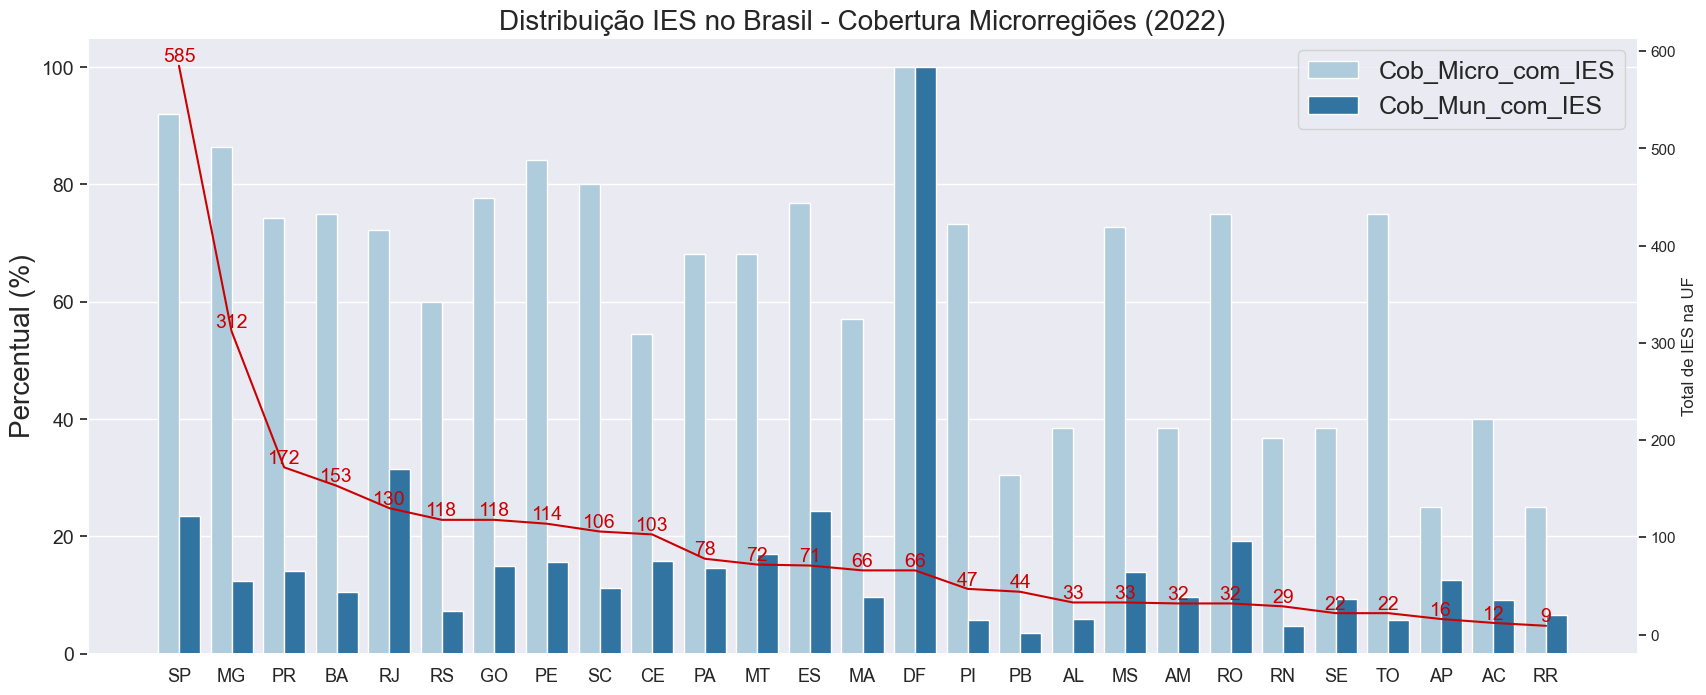

In [154]:
f, axes = plt.subplots(1, 1,  figsize=(20, 8))
cores = sns.color_palette("Paired")

#dados = df_coberturas_m[df_coberturas_m['variable']!='Total_IES']
dados = df_coberturas_m[df_coberturas_m['variable'].isin(['Cob_Mun_com_IES','Cob_Micro_com_IES'])]

# ordem das UFs no eixo x
my_order = list(df_coberturas.sort_values(by='Total_IES', ascending=False)['SG_UF_IES'])

sns.barplot(x='SG_UF_IES', y='value', hue='variable', 
            data=dados,
            ax=axes, 
            palette=cores, 
            order=my_order,
            hue_order=['Cob_Micro_com_IES','Cob_Mun_com_IES'])

axes.set_title('Distribuição IES no Brasil - Cobertura Microrregiões (2022)', fontsize=20)
axes.set_xlabel('')
axes.set_ylabel("Percentual (%)", fontsize = 20)
xlocs, xlabels = plt.xticks()
ylocs, ylabels = plt.yticks()
plt.setp(xlabels, rotation=0, fontsize=13)
plt.setp(ylabels, fontsize=14)

dados2 = df_coberturas[['SG_UF_IES','Total_IES']].sort_values(by='Total_IES', ascending=False)
x=dados2['SG_UF_IES']
y=dados2['Total_IES']
axes2 = axes.twinx()
axes2.plot(x, y, color='#cc0000', label='Total IES')
axes2.set_ylabel("Total de IES na UF")
axes2.grid(visible=False)

for i, j in zip(x, y):
    axes2.text(i,j, str(j), ha='center', va='bottom', color='#cc0000', fontsize=14)

axes.legend(loc='best', fontsize=18)

plt.show()

In [155]:
# para checar
col = ['SG_UF_IES','Total_IES',
       'Total_Mun_UF','Total_mun_IES','Cob_Mun_com_IES',
       'Total_Micro_UF','Total_Micro_IES','Cob_Micro_com_IES']
ies_agg_UF[ies_agg_UF['SG_UF_IES'].isin(['SP','MG','RR'])][col]

,SG_UF_IES,Total_IES,Total_Mun_UF,Total_mun_IES,Cob_Mun_com_IES,Total_Micro_UF,Total_Micro_IES,Cob_Micro_com_IES
10,MG,312,853,106,12.43,66,57,86.36
21,RR,9,15,1,6.67,4,1,25.00
25,SP,585,645,152,23.57,63,58,92.06


# Graficos - Informações Cursos

## Top 10 cursos mais oferecidos no Brasil

In [156]:
# no_cursos_br = cursos.groupby(['NO_CURSO'])['QT_CURSO'].count().reset_index().rename(columns={'QT_CURSO':'Total_Cursos'})
# top10_BR = no_cursos_br.sort_values(by='Total_Cursos', ascending=False).head(10)
# top10_BR

Total de todos os cursos - 2022:  31309
Total de cursos considerando-se top 10: 11717


,NO_CURSO,Total_Cursos,Total_Cursos_p_BR,Perc_top10
1,Administração,1763,5.63,15.05
253,Direito,1659,5.30,14.16
273,Educação Física,1190,3.80,10.16
113,Ciências Contábeis,1189,3.80,10.15
768,Pedagogia,1161,3.71,9.91
286,Enfermagem,1152,3.68,9.83
815,Psicologia,1070,3.42,9.13
308,Engenharia Civil,990,3.16,8.45
434,Fisioterapia,834,2.66,7.12
357,Engenharia De Produção,709,2.26,6.05


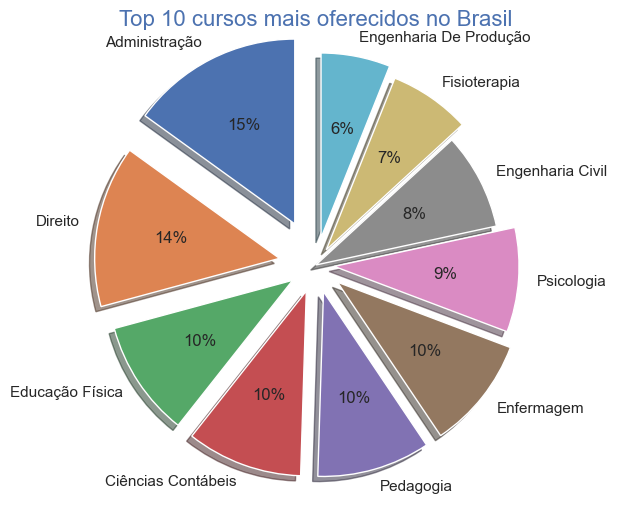

In [193]:
tot_cursos = cursos.shape[0]
tot_cursos_br = cursos.groupby(['NO_CURSO'])['QT_CURSO'].count()
perc_cursos_br = round((tot_cursos_br / tot_cursos * 100),2)

distr_cursos_br = pd.DataFrame({'Total_Cursos' : tot_cursos_br,
                                'Total_Cursos_p_BR': perc_cursos_br}).reset_index()

top10_BR = distr_cursos_br.sort_values(by='Total_Cursos', ascending=False).head(10)
top10_BR['Perc_top10'] = top10_BR['Total_Cursos'] / (top10_BR['Total_Cursos'].sum()) * 100

print('Total de todos os cursos - 2022: ', tot_cursos)
print('Total de cursos considerando-se top 10:', top10_BR['Total_Cursos'].sum())
display(top10_BR)

fig = plt.figure(figsize =(10, 6))
labels = top10_BR['NO_CURSO'].values
data = top10_BR['Total_Cursos'].values

fracs = top10_BR['Perc_top10'].values
total = sum(fracs)
explode = (0.25, 0.20, 0.15, 0.15, 0.15, 0.15, 0.1, 0, 0.1, 0.15)

plt.title("Top 10 cursos mais oferecidos no Brasil", fontsize=16, loc = 'center', color='b')
plt.pie(fracs, 
        explode=explode, 
        labels=labels,
        autopct=lambda p: '{:.0f}%'.format(p * total / 100),
        shadow=True, 
        startangle=90)

plt.show()

## Top 5 cursos por Estado

In [160]:
no_cursos_uf = cursos.groupby(['SG_UF','NO_CURSO'])['QT_CURSO'].count().reset_index().rename(columns={'QT_CURSO':'Total'})
#display(no_cursos_uf.head())

top5 = no_cursos_uf.sort_values(['SG_UF','Total'], ascending=[True, False]).groupby('SG_UF').head(5)
display(top5.head(10))

,SG_UF,NO_CURSO,Total
12,AC,Direito,9
13,AC,Educação Física,6
0,AC,Administração,5
14,AC,Enfermagem,5
17,AC,Engenharia Civil,5
62,AL,Administração,20
84,AL,Direito,19
86,AL,Enfermagem,16
132,AL,Pedagogia,16
85,AL,Educação Física,15


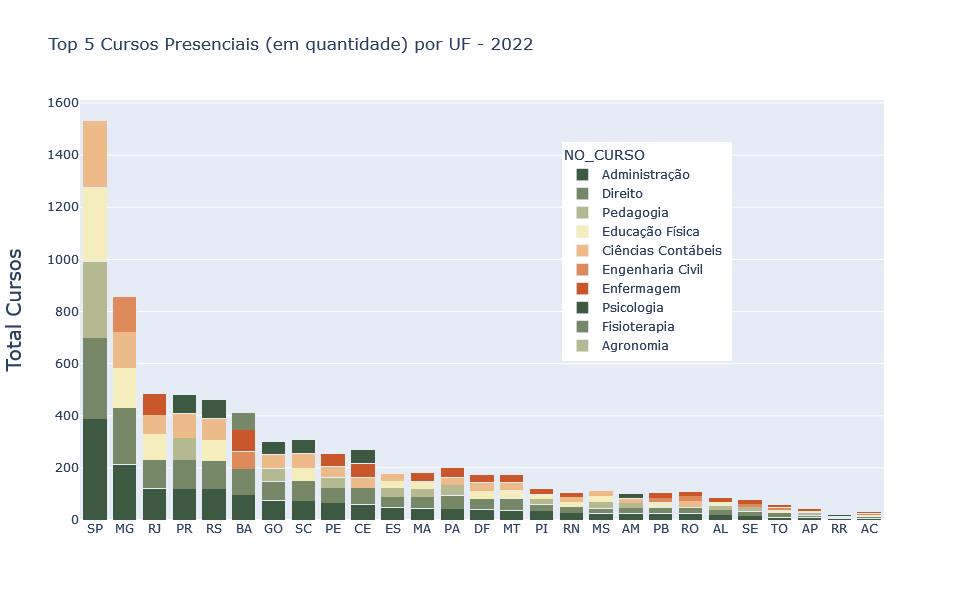

In [161]:
fig = px.bar(top5.sort_values(by='Total', ascending=False),
             x='SG_UF', 
             y='Total', 
             color='NO_CURSO',
             #color_discrete_sequence=px.colors.qualitative.Vivid, #Dark2
             #color_discrete_sequence= px.colors.sequential.Plasma_r,
             color_discrete_sequence= px.colors.diverging.Fall,
             barmode = 'stack', #stack=empilhado; group=barras separadas
             width=1000, height=600,
             title='Top 5 Cursos Presenciais (em quantidade) por UF - 2022',
             hover_data = {'NO_CURSO','Total'})

fig.update_layout(yaxis=dict(title='Total Cursos', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),      # remover titulo no eixo x
                  legend=dict(x=0.6,y=0.9)) # deslocar legenda para dentro do plot

fig.show()

In [162]:
# PARA CHECAR um exemplo
#no_cursos_uf[no_cursos_uf['SG_UF']=='SP'].sort_values(by='Total', ascending=False)
top5[top5['SG_UF']=='MG']

,SG_UF,NO_CURSO,Total
1339,MG,Direito,217
1271,MG,Administração,213
1344,MG,Educação Física,154
1308,MG,Ciências Contábeis,138
1356,MG,Engenharia Civil,134


## Total de Cursos Presenciais por UF/ Tipo Rede

In [163]:
# cursos['QT_CURSO'].value_counts() # SEMPRE VALOR 1 

# Total de cursos por UF
tot_cursos_uf = cursos.groupby('SG_UF')['QT_CURSO'].sum()

# Total e percentual de cursos por UF e Tipo de Rede
tot_cursos_uf_rede = cursos.groupby(['SG_UF','Tipo_Rede'])['QT_CURSO'].sum()
perc_cursos_uf_rede = round((tot_cursos_uf_rede/tot_cursos_uf*100),2)

# consolidar em dataframe
distr_cursos_uf_rede = pd.DataFrame({'Total_Cursos'   : tot_cursos_uf_rede,
                                     'Total_Cursos_p': perc_cursos_uf_rede}).reset_index()

distr_cursos_uf_rede.head()

,SG_UF,Tipo_Rede,Total_Cursos,Total_Cursos_p
0,AC,Privada,66,49.62
1,AC,Pública,67,50.38
2,AL,Privada,218,65.47
3,AL,Pública,115,34.53
4,AM,Privada,403,76.47


In [164]:
# testes e verificacoes (IGNORAR)
#t = cursos[cursos['SG_UF']=='RR']
#t.groupby('SG_UF')['QT_CURSO'].sum()

#distr_cursos_uf_rede[distr_cursos_uf_rede['SG_UF']=='RR']
#cursos[cursos['SG_UF']=='RR'].head(5)#.shape #130

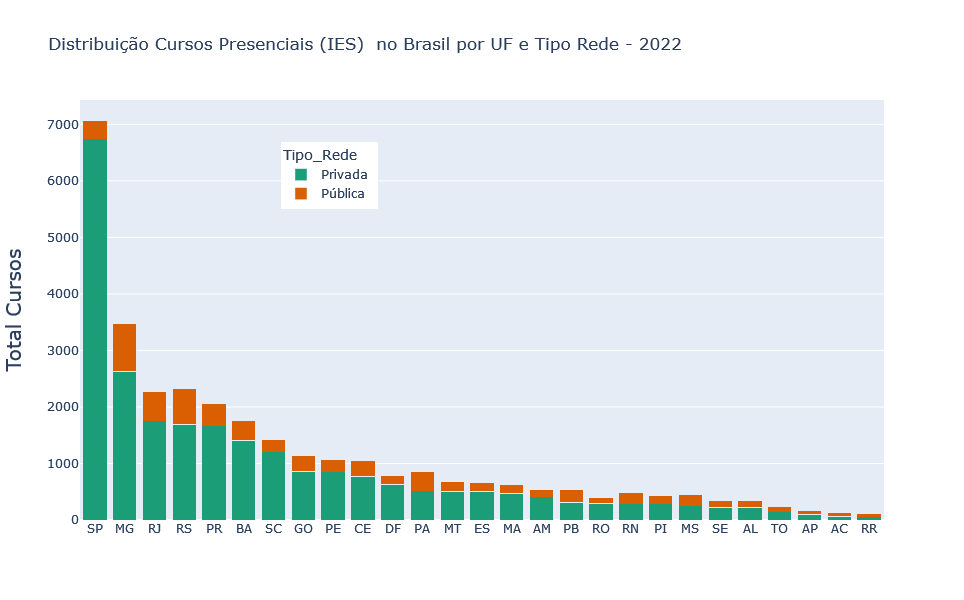

In [165]:
fig = px.bar(distr_cursos_uf_rede.sort_values(by='Total_Cursos', ascending=False),
             x='SG_UF', 
             y='Total_Cursos', 
             color='Tipo_Rede',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             barmode = 'stack', #stack=empilhado; group=barras separadas
             width=1000, height=600,
             title='Distribuição Cursos Presenciais (IES)  no Brasil por UF e Tipo Rede - 2022',
             hover_data = {'SG_UF','Tipo_Rede','Total_Cursos',
                           'Total_Cursos_p'})
fig.update_layout(yaxis=dict(title='Total Cursos', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),      # remover titulo no eixo x
                  legend=dict(x=0.25,y=0.9)) # deslocar legenda para dentro do plot
fig.show()

## Total de Cursos Presenciais por UF/ Grau Academico

In [188]:
# Total de cursos por UF
tot_cursos_uf = cursos.groupby('SG_UF')['QT_CURSO'].sum()

# Total e percentual de cursos por UF e Grau Academico (ga)
tot_cursos_uf_ga = cursos.groupby(['SG_UF','Tipo_Grau_Acad'])['QT_CURSO'].sum()
perc_cursos_uf_ga = round((tot_cursos_uf_ga/tot_cursos_uf*100),2)

# consolidar em dataframe
distr_cursos_uf_ga = pd.DataFrame({'Total_Cursos'   : tot_cursos_uf_ga,
                                   'Total_Cursos_p': perc_cursos_uf_ga}).reset_index()

distr_cursos_uf_ga.head()

,SG_UF,Tipo_Grau_Acad,Total_Cursos,Total_Cursos_p
0,AC,Bacharelado,81,60.90
1,AC,Licenciatura,35,26.32
2,AC,Tecnológico,17,12.78
3,AL,Bacharelado,240,72.07
4,AL,Licenciatura,61,18.32


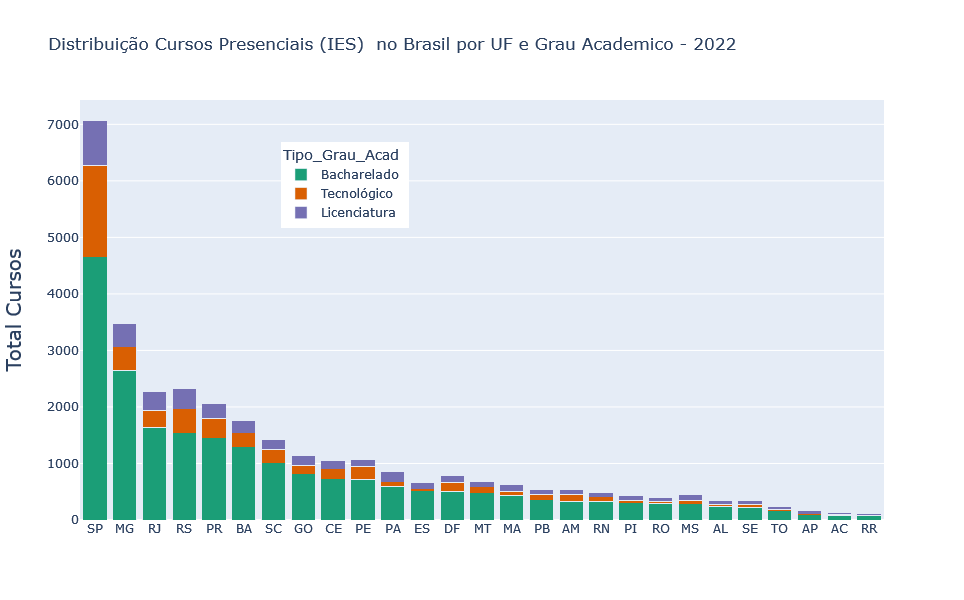

In [190]:
fig = px.bar(distr_cursos_uf_ga.sort_values(by='Total_Cursos', ascending=False),
             x='SG_UF', 
             y='Total_Cursos', 
             color='Tipo_Grau_Acad',
             color_discrete_sequence=px.colors.qualitative.Dark2,
             barmode = 'stack', #stack=empilhado; group=barras separadas
             width=1000, height=600,
             title='Distribuição Cursos Presenciais (IES)  no Brasil por UF e Grau Academico - 2022',
             hover_data = {'SG_UF','Tipo_Grau_Acad','Total_Cursos',
                           'Total_Cursos_p'})
fig.update_layout(yaxis=dict(title='Total Cursos', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),      # remover titulo no eixo x
                  legend=dict(x=0.25,y=0.9)) # deslocar legenda para dentro do plot
fig.show()

# Graficos - Informações Vagas disponíveis

In [192]:
# Total Vagas em todo Brasil, todos os cursos
print('Quantidade total de vagas PRESENCIAIS em 2022: ', cursos['QT_VG_TOTAL'].sum())

Quantidade total de vagas PRESENCIAIS em 2022:  5348216


## Quantidade de vagas ofertadas em cada Região

In [201]:
tot_vagas_br = cursos['QT_VG_TOTAL'].sum()
tot_vagas_reg = cursos.groupby('NO_REGIAO')['QT_VG_TOTAL'].sum()
perc_vagas_reg = round((tot_vagas_reg/tot_vagas_br*100),2)

# consolidar em dataframe
distr_vagas_reg = pd.DataFrame({'Total_Vagas'   : tot_vagas_reg,
                                 'Total_Vagas_p': perc_vagas_reg}).reset_index()

distr_vagas_reg = distr_vagas_reg.sort_values(by='Total_Vagas', ascending=False)
distr_vagas_reg 

,NO_REGIAO,Total_Vagas,Total_Vagas_p
3,Sudeste,2466959,46.13
1,Nordeste,1320500,24.69
4,Sul,575943,10.77
2,Norte,510738,9.55
0,Centro-Oeste,474076,8.86


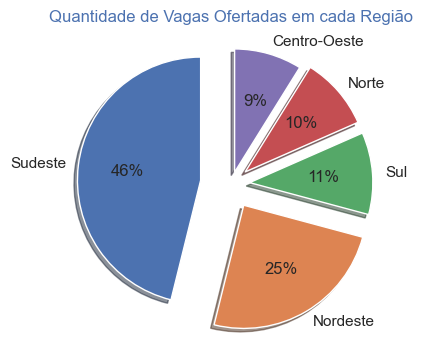

In [202]:
fig = plt.figure(figsize =(8, 4))
labels = distr_vagas_reg['NO_REGIAO'].values
data = distr_vagas_reg['Total_Vagas'].values

fracs = distr_vagas_reg['Total_Vagas_p'].values
total = sum(fracs)
explode = (0.25, 0.20, 0.15, 0.15, 0.10)

plt.title("Quantidade de Vagas Ofertadas em cada Região", fontsize=12, loc = 'center', color='b')
plt.pie(fracs, 
        explode=explode, 
        labels=labels,
        autopct=lambda p: '{:.0f}%'.format(p * total / 100),
        shadow=True, 
        startangle=90)

plt.show()

## Quantidade de vagas ofertadas em cada Região/ Tipo de Rede

In [168]:
print('Percentual de cada Região com relação ao total do País:', '\n')

tot_vagas_br = cursos['QT_VG_TOTAL'].sum()
tot_vagas_reg_rede = cursos.groupby(['NO_REGIAO','Tipo_Rede'])['QT_VG_TOTAL'].sum()
perc_vagas_reg_rede = round((tot_vagas_reg_rede / tot_vagas_br*100),2)

# consolidar em dataframe
distr_vagas_reg_rede = pd.DataFrame({'Total_Vagas'   : tot_vagas_reg_rede,
                                 'Total_Vagas_p': perc_vagas_reg_rede}).reset_index()

distr_vagas_reg_rede

Percentual de cada Região com relação ao total do País: 



,NO_REGIAO,Tipo_Rede,Total_Vagas,Total_Vagas_p
0,Centro-Oeste,Privada,423290,7.91
1,Centro-Oeste,Pública,50786,0.95
2,Nordeste,Privada,1176077,21.99
3,Nordeste,Pública,144423,2.70
4,Norte,Privada,461808,8.63
5,Norte,Pública,48930,0.91
6,Sudeste,Privada,2334859,43.66
7,Sudeste,Pública,132100,2.47
8,Sul,Privada,477242,8.92
9,Sul,Pública,98701,1.85


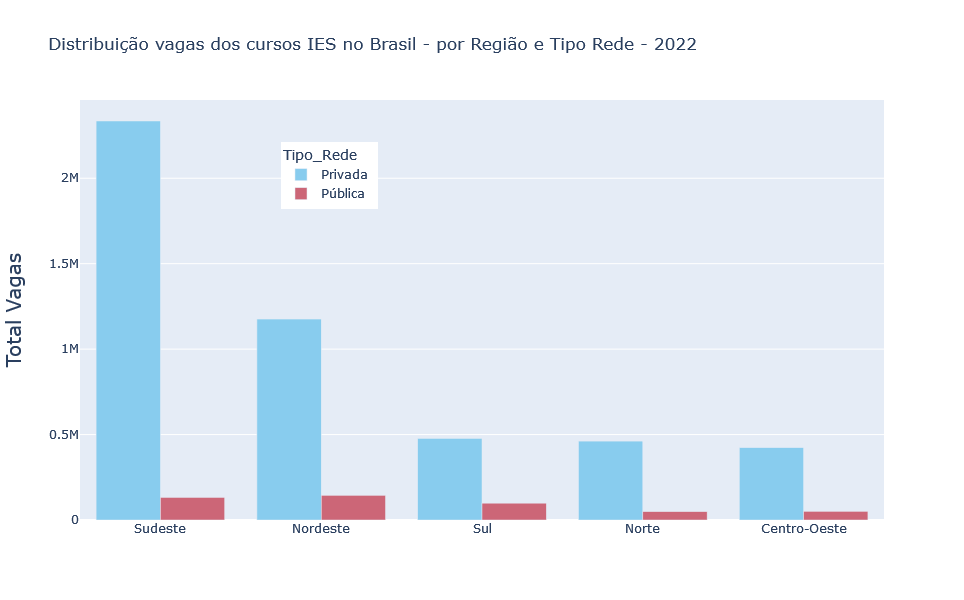

In [169]:
fig = px.bar(distr_vagas_reg_rede.sort_values(by='Total_Vagas', ascending=False),
             x='NO_REGIAO', 
             y='Total_Vagas', 
             color='Tipo_Rede',
             color_discrete_sequence=px.colors.qualitative.Safe,
             barmode = 'group', width=1000, height=600,
             title='Distribuição vagas dos cursos IES no Brasil - por Região e Tipo Rede - 2022',
             hover_data = {'Total_Vagas','Total_Vagas_p'} )

fig.update_layout(yaxis=dict(title='Total Vagas', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),      # remover titulo no eixo x
                  legend=dict(x=0.25,y=0.9)) # deslocar legenda para dentro do plot

fig.show()

## Quantidade de vagas ofertadas em cada UF/ Tipo Rede

In [170]:
print('Percentual de cada UF com relação ao total da própria UF:', '\n')

# total de vagas por UF
tot_vag_uf = cursos.groupby('SG_UF')['QT_VG_TOTAL'].sum()

# total de vagas por UF e Tipo Rede
tot_vag_uf_rede = cursos.groupby(['SG_UF','Tipo_Rede'])['QT_VG_TOTAL'].sum()

# percentual de vagas por UF e Tipo Rede
perc_vag_uf_rede = round(tot_vag_uf_rede / tot_vag_uf *100,2)

# consolidar em dataframe
distr_vag_uf_rede = pd.DataFrame({'Total_Vagas'   : tot_vag_uf_rede,
                                 'Total_Vagas_p': perc_vag_uf_rede}).reset_index()

# exibir primeiras linhas
distr_vag_uf_rede.head()
#display(distr_vag_uf_rede.sort_values(by='SG_UF_IES', ascending=True).head(6))

Percentual de cada UF com relação ao total da própria UF: 



,SG_UF,Tipo_Rede,Total_Vagas,Total_Vagas_p
0,AC,Privada,21542,84.93
1,AC,Pública,3821,15.07
2,AL,Privada,51615,81.86
3,AL,Pública,11435,18.14
4,AM,Privada,135003,95.53


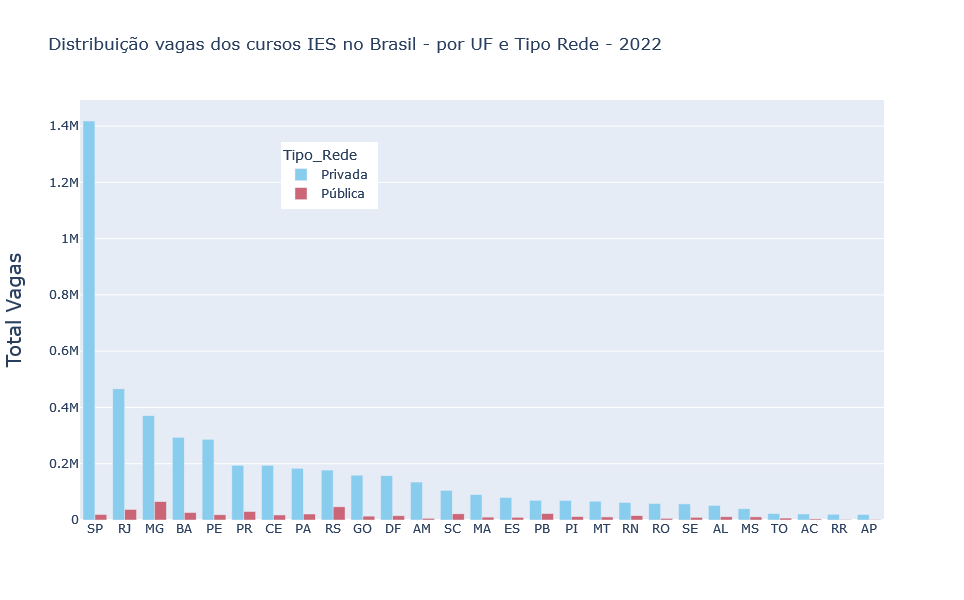

In [171]:
fig = px.bar(distr_vag_uf_rede.sort_values(by='Total_Vagas', ascending=False),
             x='SG_UF', 
             y='Total_Vagas', 
             color='Tipo_Rede',
             color_discrete_sequence=px.colors.qualitative.Safe,
             barmode = 'group', width=1000, height=600,
             title='Distribuição vagas dos cursos IES no Brasil - por UF e Tipo Rede - 2022',
             hover_data = {'Total_Vagas',
                           'Total_Vagas_p'}
            )

fig.update_layout(yaxis=dict(title='Total Vagas', titlefont_size=20, tickfont_size=12),
                  xaxis=dict(title=''),      # remover titulo no eixo x
                  legend=dict(x=0.25,y=0.9)) # deslocar legenda para dentro do plot

fig.show()

In [172]:
distr_vag_uf_rede[distr_vag_uf_rede['SG_UF'].isin(['SP','MG','RJ','ES'])]

,SG_UF,Tipo_Rede,Total_Vagas,Total_Vagas_p
14,ES,Privada,80033,89.25
15,ES,Pública,9636,10.75
20,MG,Privada,370718,85.02
21,MG,Pública,65302,14.98
36,RJ,Privada,466077,92.54
37,RJ,Pública,37573,7.46
50,SP,Privada,1418031,98.64
51,SP,Pública,19589,1.36
